# Introduction

graph

In [170]:
%run include/required_libs.py
%matplotlib inline

In [171]:
unit = pd.read_csv('rawdata/accts_vs_units.csv')
le = pd.read_csv('rawdata/legacy_summary.csv')
le['cycle']=2018
cycles = list(range(2013,2019))

### Allocation

#### Firstly, get a list of TOP 5 that have the highest total allocation

In [172]:
alc = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
change = alc[alc.account.isin(list(le['account'])) & alc.cycle.isin(['2018'])].groupby('account')['allocation'].sum().to_frame().reset_index()
    
alc = alc.append(le)[['account','allocation','cycle']]
alc = alc.join(unit.set_index('account'), on='account')
alloc_unit =alc[['cycle','unit','allocation']]
alloc_unit

,cycle,unit,allocation
0,2013,IME,2000000.0
1,2013,PSD,1325000.0
2,2013,PSD,700000.0
3,2013,PSD,500000.0
4,2013,PSD,500000.0
5,2013,PSD,500000.0
6,2013,BSD,500000.0
7,2013,BSD,500000.0
8,2013,CI,500000.0
9,2013,PSD,300000.0


In [173]:
ua = alloc_unit.groupby('unit')['allocation'].sum().to_frame().\
sort_values('allocation', ascending=False).reset_index()


leng = list(ua.count())[0]
other = ua.loc[5:leng, ['unit','allocation']].sum().to_frame().T
other['unit'][0]='Others'

top = ua.drop(ua.index[range(5,leng)])
top = top.append(other, ignore_index=True)
alloc_top_5 =  list(top['unit'])
alloc_top_5 

['PSD', 'BSD', 'Booth', 'IME', 'CI', 'Others']

#### The we will make changes to acc_unit  table (have cycle and all units), sorting them to top_5 and 'other'

In [174]:
unit_all = alloc_unit
unit_all['unit2'] = unit_all['unit']
unit_all['unit'] = list(unit_all.unit2.astype("category", ordered = True, categories = alloc_top_5))
unit_all = unit_all.fillna('Others').groupby(['cycle','unit'])['allocation'].sum().to_frame()
unit_all = unit_all.reset_index()
unit_all['allocation'] = unit_all['allocation'] /1000000
unit_all

,cycle,unit,allocation
0,2013,BSD,1.310000
1,2013,Booth,0.205000
2,2013,CI,0.550000
3,2013,IME,2.000000
4,2013,Others,0.050000
5,2013,PSD,5.130000
6,2014,BSD,3.939000
7,2014,Booth,3.581000
8,2014,CI,1.450000
9,2014,IME,1.480000


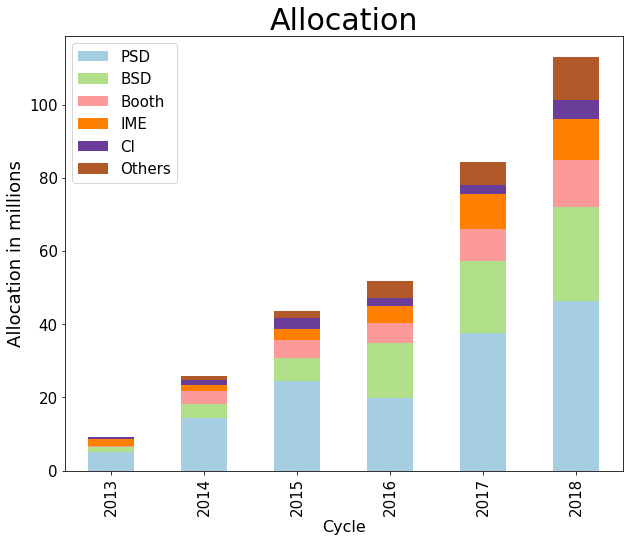

In [175]:
unit_by_cycle = unit_all.pivot(index='cycle', columns='unit', values='allocation')

mmm = unit_by_cycle.loc[:,alloc_top_5].plot(kind='bar', stacked=True, title='Allocation',colormap='Paired')
mmm.title.set_size(30)
fig = mmm.get_figure()

plt.ylabel('Allocation in millions', fontsize=18)
plt.xlabel('Cycle', fontsize=16)
plt.legend(fontsize=15);                                                         ## lengend size
mmm.xaxis.set_tick_params(labelsize=15)                                             ## tick size
mmm.yaxis.set_tick_params(labelsize=15)
fig.set_size_inches(10, 8)                                                        ## figure size 

fig.savefig('image/2_2_allocs_amounts.png')

### Allocation : Portion 

In [176]:
totals = list(unit_all.groupby(['cycle'])['allocation'].sum())
unit_portion = unit_all  # copy table for portion part
for i in cycles:  #unit_portion is from previous copy of unit_all
    unit_portion.loc[unit_portion['cycle'] == i , 'Allocation_Portion'] = unit_portion.loc[unit_portion['cycle'] == i , 'allocation']/ totals[i-2013]
unit_portion

,cycle,unit,allocation,Allocation_Portion
0,2013,BSD,1.310000,0.141698
1,2013,Booth,0.205000,0.022174
2,2013,CI,0.550000,0.059492
3,2013,IME,2.000000,0.216333
4,2013,Others,0.050000,0.005408
5,2013,PSD,5.130000,0.554895
6,2014,BSD,3.939000,0.152503
7,2014,Booth,3.581000,0.138643
8,2014,CI,1.450000,0.056138
9,2014,IME,1.480000,0.057300


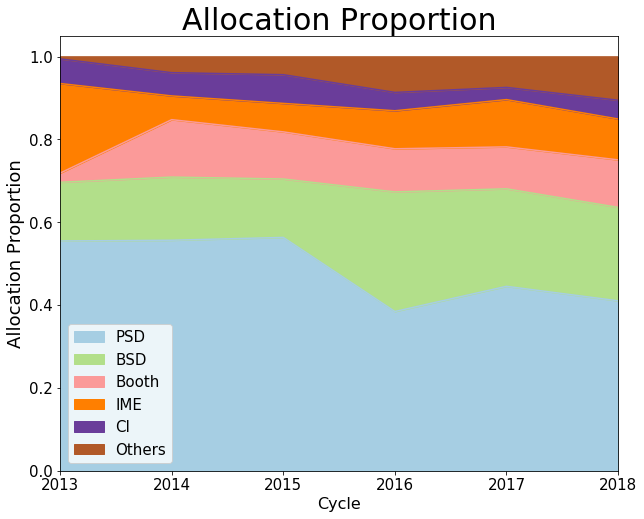

In [177]:
por = unit_portion.pivot(index='cycle', columns='unit', values='Allocation_Portion')  
ax = por.loc[:,alloc_top_5].plot.area(title='Allocation Proportion',colormap='Paired')
ax.title.set_size(30)
fig=ax.get_figure();
plt.ylabel('Allocation Proportion', fontsize=18)
plt.xlabel('Cycle', fontsize=16)
plt.legend(fontsize=15);                                                         ## lengend size
ax.xaxis.set_tick_params(labelsize=15)                                             ## tick size
ax.yaxis.set_tick_params(labelsize=15)
fig.set_size_inches(10, 8)                                                        ## figure size 

fig.savefig('image/2_2_allocs_fractions.png')

## Usage

In [178]:
usa = pd.read_csv('rawdata/usages_by_cycle_group.csv')

le = le.rename(columns={'usage':'su'})
usa = usa.append(le)[['account','su','cycle']]

In [179]:
ss = usa.join(unit.set_index('account'), on='account')
usage_unit = ss[['cycle','unit','su']]
usage_unit = usage_unit.groupby(['cycle','unit'])['su'].sum().to_frame().reset_index()
usage_unit

,cycle,unit,su
0,2013,BSD,2220635.78
1,2013,Booth,507253.94
2,2013,CI,268501.94
3,2013,Harris,6798.22
4,2013,Humanities,940.58
5,2013,IME,5747291.37
6,2013,PSD,8181956.05
7,2013,RCC,220127.27
8,2013,SSD,31942.47
9,2014,BFI,878.50


In [180]:
us = usage_unit.groupby('unit')['su'].sum().to_frame().\
sort_values('su', ascending=False).reset_index()

leng = list(us.count())[0]
other = us.loc[5:leng, ['unit','su']].sum().to_frame().T
other['unit'][0]='Others'

top = us.drop(us.index[range(5,leng)])
top = top.append(other, ignore_index=True)
usage_top_5 = list(top['unit'])                      # Important Note:
usage_top_5   # since we find the top 5 of allocations and usages are the same, we use "alloc_top_5" 
              # in place of "usage_top_5" for color in later part to keep the order of divisions

['PSD', 'IME', 'BSD', 'Booth', 'CI', 'Others']

In [181]:
unit_con = usage_unit
unit_con['unit'] = list(usage_unit.unit.astype("category", ordered=True, categories=usage_top_5))
unit_con = unit_con.fillna('Others').groupby(['cycle','unit'])['su'].sum().to_frame()
unit_con = unit_con.reset_index()
unit_con['su'] = unit_con['su'] /1000000

import os.path, time
Last_data = time.ctime(os.path.getmtime('rawdata/usages_by_cycle_group.csv')) #'Mon May  7 16:29:32 2018'
Last_data = datetime.strptime(Last_data,'%c').strftime('%x') #change format
from datetime import datetime
a = datetime.strptime(Last_data, '%x') # days up to the usage record
b = datetime.strptime('9/30/17', '%x') # beginning of last year
gap_day = (a - b).days  # gap_day = 219

unit_con['su_projected'] = unit_con['su']
unit_con.iloc[-6:-1, -1] = unit_con['su'].iloc[-6:-1] * 365 / gap_day
usage_portion = unit_con # for portion part

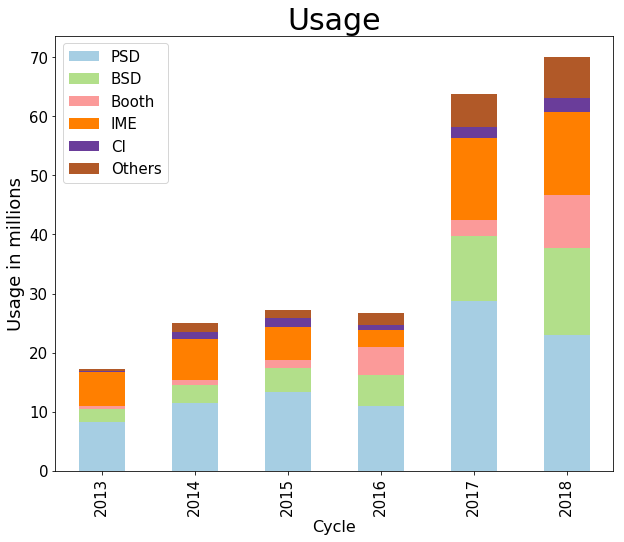

In [182]:
unit_by_cycle = unit_con.pivot(index='cycle', columns='unit', values='su_projected')

mmm = unit_by_cycle.loc[:,alloc_top_5].plot(kind='bar', stacked=True, title='Usage',colormap='Paired')
mmm.title.set_size(30)
fig = mmm.get_figure()

plt.ylabel('Usage in millions', fontsize=18)
plt.xlabel('Cycle', fontsize=16)
plt.legend(fontsize=15);                                                         ## lengend size
mmm.xaxis.set_tick_params(labelsize=15)                                             ## tick size
mmm.yaxis.set_tick_params(labelsize=15)
fig.set_size_inches(10, 8)                                                        ## figure size 

fig.savefig('image/2_2_usages_amounts.png')

### Usage Portion

In [183]:
totals = list(unit_con.groupby(['cycle'])['su_projected'].sum())

for i in cycles:  #usage_portion is from previous copy of unit_all, cycles is from Allocation Portion
    usage_portion.loc[usage_portion['cycle'] == i , 'Portion'] = usage_portion.loc[usage_portion['cycle'] == i , 'su_projected']/ totals[i-2013]
usage_portion

,cycle,unit,su,su_projected,Portion
0,2013,BSD,2.220636,2.220636,0.129216
1,2013,Booth,0.507254,0.507254,0.029516
2,2013,CI,0.268502,0.268502,0.015624
3,2013,IME,5.747291,5.747291,0.334428
4,2013,Others,0.259809,0.259809,0.015118
5,2013,PSD,8.181956,8.181956,0.476098
6,2014,BSD,3.050530,3.050530,0.121815
7,2014,Booth,0.829035,0.829035,0.033105
8,2014,CI,1.203668,1.203668,0.048065
9,2014,IME,6.919512,6.919512,0.276313


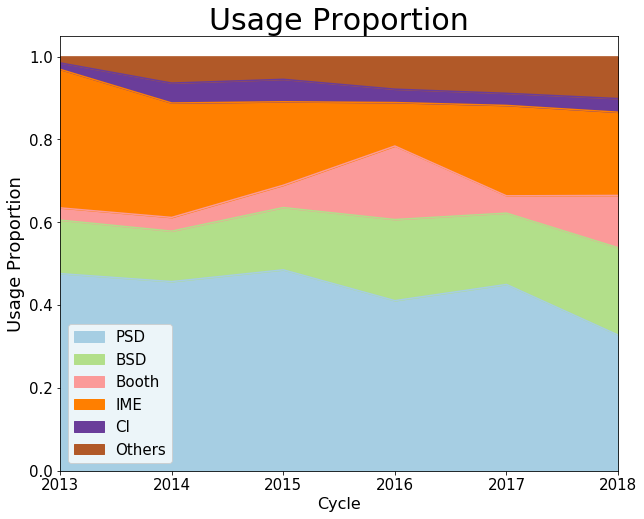

In [184]:
por = usage_portion.pivot(index='cycle', columns='unit', values='Portion')  
ax = por.loc[:,alloc_top_5].plot.area(title='Usage Proportion',colormap='Paired')
ax.title.set_size(30)
fig=ax.get_figure();
plt.ylabel('Usage Proportion', fontsize=18)
plt.xlabel('Cycle', fontsize=16)
plt.legend(fontsize=15);                                                         ## lengend size
ax.xaxis.set_tick_params(labelsize=15)                                             ## tick size
ax.yaxis.set_tick_params(labelsize=15)
fig.set_size_inches(10, 8)                                                        ## figure size 

fig.savefig('image/2_2_usages_fractions.png')

### put allocation and usage table together

In [185]:
unit_stat = unit_portion[['cycle','unit']]
unit_stat['Allocation']         = unit_portion['allocation']
unit_stat['Allocation_Portion'] = unit_portion['Allocation_Portion']
unit_stat['Consumed']           = unit_con['su_projected']
unit_stat['Comsumed_portion']   = usage_portion['Portion']
unit_stat.to_csv('result/2_2_allocs_usags_by_units.csv')
unit_stat

,cycle,unit,Allocation,Allocation_Portion,Consumed,Comsumed_portion
0,2013,BSD,1.310000,0.141698,2.220636,0.129216
1,2013,Booth,0.205000,0.022174,0.507254,0.029516
2,2013,CI,0.550000,0.059492,0.268502,0.015624
3,2013,IME,2.000000,0.216333,5.747291,0.334428
4,2013,Others,0.050000,0.005408,0.259809,0.015118
5,2013,PSD,5.130000,0.554895,8.181956,0.476098
6,2014,BSD,3.939000,0.152503,3.050530,0.121815
7,2014,Booth,3.581000,0.138643,0.829035,0.033105
8,2014,CI,1.450000,0.056138,1.203668,0.048065
9,2014,IME,1.480000,0.057300,6.919512,0.276313
